# Work with AnnData

`AnnData` is widely used in bioinformatic software because of its highly compatible design and efficient functions, further information in [AnnData Docs](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)

## Simple Start

To meet the needs of more users, we integrate `AnnData` functionality into `StereoExpData` through adapter mode.

Read `.h5ad` file into `AnnBasedStereoExpData`.

In [2]:
import stereo as st

data = st.io.read_h5ad('./mouse_forebrain.anndata_075.h5ad')

Show `AnnData` infomation.

In [3]:
data._ann_data

AnnData object with n_obs × n_vars = 9092 × 10276
    obs: 'annotation', 'celltype', 'class', 'leiden', 'timepoint'
    var: 'fuzzy_C_result', 'greater_pvalue', 'less_pvalue', 'log1p_mean_counts', 'log1p_total_counts', 'logFC'
    uns: 'sn'
    obsm: 'spatial'

And we automatically index `data.exp_matrix` to `data._ann_data.X`, which means you can read a `.h5ad` file and use it as `StereoExpData`.

In [4]:
data.exp_matrix is data._ann_data.X

True

## Supported StereoExpData Features

* exp_matrix: `_ann_data.X`
* postion `_ann.uns`
* cells: `_ann_data.obs`
* genes: `_ann_data.var`

## Supported StereoExpData Functions

Most tools and plot functions are supported.

In [5]:
data.tl.cal_qc()
data.tl.raw_checkpoint()
data.tl.normalize_total(target_sum=1e4)
data.tl.log1p()
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3, min_disp=0.5, res_key='highly_variable_genes', n_top_genes=None)
data.tl.pca(use_highly_genes=True, hvg_res_key='highly_variable_genes', n_pcs=20, res_key='pca_test', svd_solver='arpack')
data.tl.neighbors(pca_res_key='pca_test', n_pcs=30, res_key='neighbors_test', n_jobs=8)
data.tl.umap(pca_res_key='pca_test', neighbors_res_key='neighbors_test', res_key='umap_test', init_pos='spectral')
data.tl.leiden(neighbors_res_key='neighbors_test', res_key='leiden_test')

[2023-11-14 16:44:32][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run cal_qc...
[2023-11-14 16:44:32][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: cal_qc end, consume time 0.2945s.
[2023-11-14 16:44:32][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run normalize_total...
[2023-11-14 16:44:33][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: normalize_total end, consume time 0.2316s.
[2023-11-14 16:44:33][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run log1p...
[2023-11-14 16:44:33][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: log1p end, consume time 0.1042s.
[2023-11-14 16:44:33][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run highly_variable_genes...
[2023-11-14 16:44:34][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: highly_variable_genes end, consume time 0.8514s.
[2023-

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2023-11-14 16:46:28][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: umap end, consume time 49.9396s.
[2023-11-14 16:46:28][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run leiden...
[2023-11-14 16:46:29][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: leiden end, consume time 1.6195s.


See what self-defined results have been written to `_ann_data`. 

In [6]:
data._ann_data

AnnData object with n_obs × n_vars = 9092 × 10276
    obs: 'annotation', 'celltype', 'class', 'leiden', 'timepoint', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden_test'
    var: 'fuzzy_C_result', 'greater_pvalue', 'less_pvalue', 'log1p_mean_counts', 'log1p_total_counts', 'logFC', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'sn', 'highly_variable_genes', 'pca_test', 'neighbors_test', 'umap_test', 'leiden_test', 'gene_exp_leiden_test'
    obsm: 'spatial', 'X_pca_test', 'X_umap_test'
    obsp: 'neighbors_test_connectivities', 'neighbors_test_distances'

Get a new column `leiden_test` after `leiden`, which could be displayed through `_ann_data.obs` or `cells`.

In [7]:
data._ann_data.obs

,annotation,celltype,class,leiden,timepoint,total_counts,n_genes_by_counts,pct_counts_mt,leiden_test
209_102-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,12112.0,3527,0.908190,22
209_87-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,13954.0,3785,0.716640,22
209_88-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,13810.0,3766,0.782042,22
209_89-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,15159.0,3925,0.864173,22
209_90-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,15711.0,4024,0.668322,22
...,...,...,...,...,...,...,...,...,...
679_180-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,6986.0,2124,0.844546,11
679_181-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,6461.0,2063,0.665532,11
679_182-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,7860.0,2265,0.725191,11
679_183-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,7732.0,2172,1.138127,11


Plot the results of UMAP.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

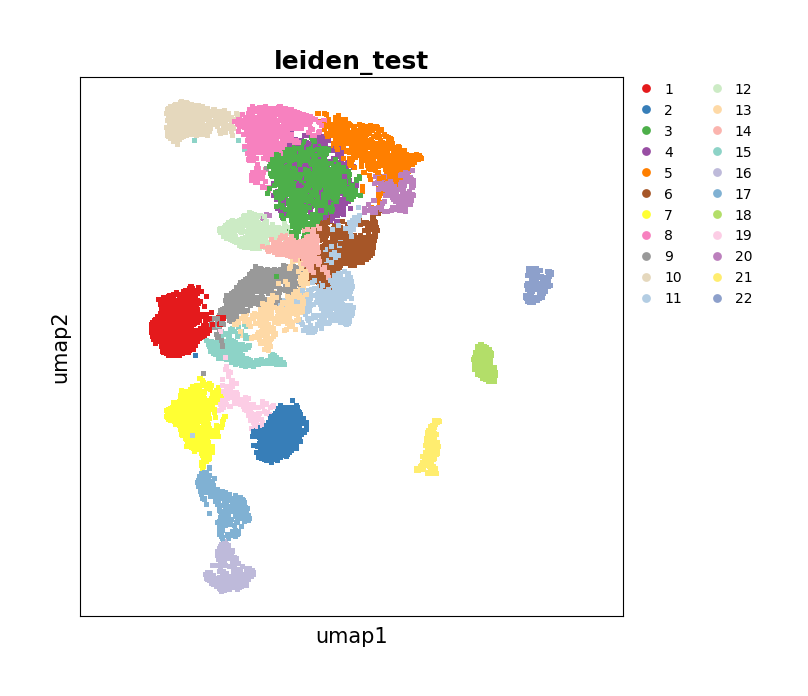

In [8]:
data.plt.umap(res_key='umap_test', cluster_key='leiden_test')

## Using Result in `.h5ad`

By glancing at `data._ann_data`, we find `neighbors` in `.uns` are produced by other bioinformatical softwares. We can use it as input to Leiden clustering.

In [9]:
data._ann_data

AnnData object with n_obs × n_vars = 9092 × 10276
    obs: 'annotation', 'celltype', 'class', 'leiden', 'timepoint', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden_test'
    var: 'fuzzy_C_result', 'greater_pvalue', 'less_pvalue', 'log1p_mean_counts', 'log1p_total_counts', 'logFC', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'sn', 'highly_variable_genes', 'pca_test', 'neighbors_test', 'umap_test', 'leiden_test', 'gene_exp_leiden_test'
    obsm: 'spatial', 'X_pca_test', 'X_umap_test'
    obsp: 'neighbors_test_connectivities', 'neighbors_test_distances'

In [10]:
data.tl.leiden(neighbors_res_key='neighbors_test', res_key='leiden_new')

[2023-11-14 16:46:30][Stereo][77692][MainThread][140240360204096][st_pipeline][37][INFO]: start to run leiden...
[2023-11-14 16:46:31][Stereo][77692][MainThread][140240360204096][st_pipeline][40][INFO]: leiden end, consume time 1.1456s.


In [11]:
data._ann_data.obs

,annotation,celltype,class,leiden,timepoint,total_counts,n_genes_by_counts,pct_counts_mt,leiden_test,leiden_new
209_102-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,12112.0,3527,0.908190,22,22
209_87-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,13954.0,3785,0.716640,22,22
209_88-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,13810.0,3766,0.782042,22,22
209_89-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,15159.0,3925,0.864173,22,22
209_90-0,Brain,RglDF12,Dorsal forebrain,7,E9.5,15711.0,4024,0.668322,22,22
...,...,...,...,...,...,...,...,...,...,...
679_180-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,6986.0,2124,0.844546,11,11
679_181-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,6461.0,2063,0.665532,11,11
679_182-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,7860.0,2265,0.725191,11,11
679_183-7,Brain,Neur511,Cortical or hippocampal glutamatergic,3,E16.5,7732.0,2172,1.138127,11,11


## Writing to `.h5ad`

Use `AnnData`'s function `write_h5ad` to write `AnnBasedStereoExpData` to `.h5ad` file.

In [12]:
data._ann_data.write_h5ad('./SS200000135TL_D1.stereo.h5ad')